In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *
import scipy

### Contur data:

#### Data (measured):

In [21]:
data_obs = np.array([1.129501e-02, 8.518551e-03, 5.196489e-03, 2.585358e-03, 1.099220e-03, 4.466096e-04, 1.558704e-04, 7.694208e-06])

#### SM Background:

In [22]:
# From HEPData/Table2.csv (PWG+PYTHIA8)
# Corresponds to the theory prediction WIHTOUT NNLO reweighting
theoryBlock = """
From ATLAS_2022_I203774-Theory.yoda:
# xval	 xerr-	 xerr+	 yval	 yerr-	 yerr+	
3.680000e+02	1.300000e+01	1.300000e+01	1.279688e-02	3.288730e-03	2.684552e-04
4.005000e+02	1.950000e+01	1.950000e+01	9.729670e-03	2.573953e-03	2.325265e-04
4.490000e+02	2.900000e+01	2.900000e+01	6.077057e-03	1.592956e-03	2.043380e-04
5.135000e+02	3.550000e+01	3.550000e+01	3.098760e-03	8.270378e-04	1.097391e-04
5.910000e+02	4.200000e+01	4.200000e+01	1.362147e-03	3.663974e-04	5.330028e-05
6.765000e+02	4.350000e+01	4.350000e+01	5.439250e-04	1.298381e-04	8.712391e-06
7.780000e+02	5.800000e+01	5.800000e+01	1.954953e-04	4.865226e-05	1.035270e-05
1.418000e+03	5.820000e+02	5.820000e+02	9.935645e-06	2.420555e-06	1.003932e-06
"""
bgData = np.genfromtxt(theoryBlock.splitlines(),skip_header=2)
bg = bgData[:,-3]
bgError = bgData[:,-2]
# Background relative uncertainty:
print('BG relative error (Contur): %1.2f to %1.2f' %((bgError/bg).min(),(bgError/bg).max()))
print('(The ATLAS SM uncertainty for setting limits on the EFT coefficients seems to be 5% (see Fig.19 in 2202.12134))')
bg

BG relative error (Contur): 0.24 to 0.27
(The ATLAS SM uncertainty for setting limits on the EFT coefficients seems to be 5% (see Fig.19 in 2202.12134))


array([1.279688e-02, 9.729670e-03, 6.077057e-03, 3.098760e-03,
       1.362147e-03, 5.439250e-04, 1.954953e-04, 9.935645e-06])

#### Signal

In [23]:
sig = np.array([7.11288462e-07,1.72211154e-06,1.71594397e-06,1.18480085e-06, 6.48651071e-07, 2.41585517e-07, 1.15588276e-07, 7.22221478e-10])

#### Convariance Matrix

In [24]:
# Assumes the total covariance matrix is the same as the data covariane plus the SM background systematical error along the diagonal (uncorrelated errors)
# (Contur also adds a statistical error matrix, which is negligible in this case)
covMatrix_data = np.array([[1.142214e-08,1.325784e-09,-1.663448e-09,2.868488e-12,3.979517e-11
                            ,2.339939e-11,4.412650e-12,-2.616067e-13]
                          ,[1.325784e-09,3.858134e-09,3.056110e-10,-4.043711e-10,1.521823e-11
                            ,3.083766e-11,4.475435e-12,1.500924e-13]
                          ,[-1.663448e-09,3.056110e-10,2.142090e-09,-4.282184e-11,-1.242758e-10
                            ,7.846414e-12,8.585527e-13,-4.532174e-13]
                          ,[2.868488e-12,-4.043711e-10,-4.282184e-11,9.223829e-10,-2.658358e-11
                            ,-5.051675e-11,1.007103e-12,1.404324e-13]
                          ,[3.979517e-11,1.521823e-11,-1.242758e-10,-2.658358e-11,3.466790e-10
                            ,-1.175331e-11,-1.582259e-11,1.482517e-13]
                          ,[2.339939e-11,3.083766e-11,7.846414e-12,-5.051675e-11,-1.175331e-11
                            ,1.503833e-10,-4.152634e-12,-4.322602e-13]
                          ,[4.412650e-12,4.475435e-12,8.585527e-13,1.007103e-12,-1.582259e-11
                            ,-4.152634e-12,4.672008e-11,-4.819765e-13]
                          ,[-2.616067e-13,1.500924e-13,-4.532174e-13,1.404324e-13,1.482517e-13
                            ,-4.322602e-13,-4.819765e-13,2.477684e-13]])
covMatrix_bg = np.diag(bgError**2)
covMatrix_contur = covMatrix_data+covMatrix_bg

#### Chi-Square:

In [25]:
# In this case the SM BG gives the minimum chi-square:
c2min = c2sm = chi2(0.00, sig, bg, data_obs, covMatrix_contur, 0.0)
c2obs = chi2(1.00, sig, bg, data_obs, covMatrix_contur, 0.0)
print('Chi-Square (mu=1):')
print(c2obs)
print('Chi-Square (mu=9):')
print(c2sm)
print('Delta Chi2 = %1.3f' %(c2obs-c2min))

Chi-Square (mu=1):
3.687009275274132
Chi-Square (mu=9):
3.673539288131593
Delta Chi2 = 0.013


#### CLs (Contur Procedure):

In [26]:
# P-values
pb = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2sm))
psb = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2obs))
print('p-values = ',psb,pb)
CLs_contur = 1.0 - (psb/pb)
print('CLS (contur) = %1.3f' %CLs_contur)

p-values =  0.027418930880608983 0.027641337239644792
CLS (contur) = 0.008


#### CLs (Our Procedure):

In [27]:
# P-values
p_sb = 1.0-scipy.stats.chi2.cdf(c2obs-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
print('p-values = ',p_sb,p_b)
CLs_our = 1-p_sb/(p_b)

print('CLS (our) = %1.3f' %CLs_our)

p-values =  0.9076047729434973 1.0
CLS (our) = 0.092


#### CLs values (contur output):

* SM BG = Theory:
  * Reporting CLs=0.008041, pval=0.991959, p_sb=0.027419, p_b=0.027641, ts_s_b=3.687001, ts_b=3.673539

## Recasting Data

#### Data (measured):

In [28]:
data_obs = np.array([1.129501e-02, 8.518551e-03, 5.196489e-03, 2.585358e-03, 1.099220e-03, 4.466096e-04, 1.558704e-04, 7.694208e-06])

#### SM Background:

In [29]:
# From ../plotting/distributions/check-dists-ATLAS.ipynb:
smBG_NLO = np.array([1.16790403e-02, 8.82351513e-03, 5.49061028e-03, 2.77538181e-03,
 1.21123052e-03, 4.75281936e-04, 1.68215336e-04, 8.18817615e-06])

#### Signal

In [30]:
sig_LO = np.array([1.63943741e-06, 1.84706470e-06, 2.20134377e-06, 1.55357415e-06, 8.62291400e-07, 3.96303076e-07, 1.56020505e-07, 1.77168887e-09])
sig_NLO = np.array([2.90611832e-06, 2.98240113e-06, 3.34872682e-06, 2.18939684e-06, 1.06708349e-06, 4.02325502e-07, 1.41776158e-07, 1.03817623e-09])

### Covariance Matrix

In [31]:
# Assumes the total covariance matrix is the same as the data covariane plus the total systematical error along the diagonal (uncorrelated errors)
sysError_diag = np.array([6.08613741e-04, 3.87871482e-04, 2.07389039e-04, 
                          1.11166063e-04, 6.44491833e-05, 2.99563065e-05, 1.49690496e-05, 1.10314213e-06])
covMatrix = covMatrix_data + np.diag(sysError_diag**2)

array([[ 3.81832826e-07,  1.32578400e-09, -1.66344800e-09,
         2.86848800e-12,  3.97951700e-11,  2.33993900e-11,
         4.41265000e-12, -2.61606700e-13],
       [ 1.32578400e-09,  1.54302421e-07,  3.05611000e-10,
        -4.04371100e-10,  1.52182300e-11,  3.08376600e-11,
         4.47543500e-12,  1.50092400e-13],
       [-1.66344800e-09,  3.05611000e-10,  4.51523035e-08,
        -4.28218400e-11, -1.24275800e-10,  7.84641400e-12,
         8.58552700e-13, -4.53217400e-13],
       [ 2.86848800e-12, -4.04371100e-10, -4.28218400e-11,
         1.32802765e-08, -2.65835800e-11, -5.05167500e-11,
         1.00710300e-12,  1.40432400e-13],
       [ 3.97951700e-11,  1.52182300e-11, -1.24275800e-10,
        -2.65835800e-11,  4.50037623e-09, -1.17533100e-11,
        -1.58225900e-11,  1.48251700e-13],
       [ 2.33993900e-11,  3.08376600e-11,  7.84641400e-12,
        -5.05167500e-11, -1.17533100e-11,  1.04776360e-09,
        -4.15263400e-12, -4.32260200e-13],
       [ 4.41265000e-12,  4.475435

#### Chi-Square:

In [45]:
# In this case the SM BG gives the minimum chi-square:
c2min = c2sm = chi2(0.00, sig_LO, smBG_NLO, data_obs, covMatrix, 0.0)
c2obs = chi2(1.00, sig_LO, smBG_NLO, data_obs, covMatrix, 0.0)
print('Chi-Square (mu=1):')
print(c2obs)
print('Chi-Square (mu=9):')
print(c2sm)
print('Delta Chi2 = %1.3f' %(c2obs-c2min))

Chi-Square (mu=1):
13.98294584399471
Chi-Square (mu=9):
10.139227292896178
Delta Chi2 = 3.844


#### CLs (Contur Procedure):

In [46]:
# P-values
p_b = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2sm))
p_sb = 1.0 - scipy.stats.norm.cdf(np.sqrt(c2obs))
print('p-values = ',p_sb,p_b)
CLs_contur = 1.0 - (p_sb/p_b)
print('CLS (contur) = %1.3f' %CLs_contur)
print('Exclusion = %1.2f%%' %((CLs_contur)*1e2)) # This is the number quoted by Contur!

p-values =  9.22381733476918e-05 0.000725734971811276
CLS (contur) = 0.873
Exclusion = 87.29%


#### CLs (Our Procedure):

In [47]:
# In this case the SM BG gives the minimum chi-square:
p_sb = 1.0-scipy.stats.chi2.cdf(c2obs-c2min,df=1)
p_b = 1.0-scipy.stats.chi2.cdf(c2sm-c2min,df=1)
print('p-values = ',p_sb,p_b)
CLs = 1.0 - p_sb/(p_b)
# CLs = 0.05 should give the 95%C.L. exclusion
print('CLs = %1.3f' %(CLs))
print('Exclusion = %1.2f%%' %((CLs)*1e2)) # This is the number quoted by Contur!

p-values =  0.04993266400939511 1.0
CLs = 0.950
Exclusion = 95.01%


## Plots

In [35]:
atlas_bins = np.array([355.0,381.0,420.0,478.0,549.0,633.0,
                        720.0,836.0,2000.0])

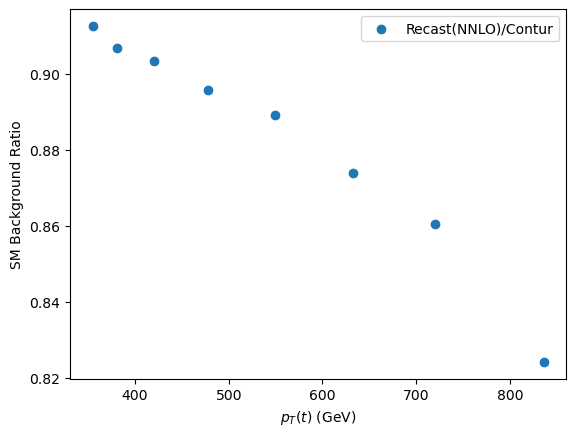

In [36]:
plt.scatter(atlas_bins[:-1],smBG_NLO/bg,label='Recast(NNLO)/Contur')
plt.xlabel(r'$p_T(t)$ (GeV)')
plt.ylabel(r'SM Background Ratio')
plt.legend()
plt.show()

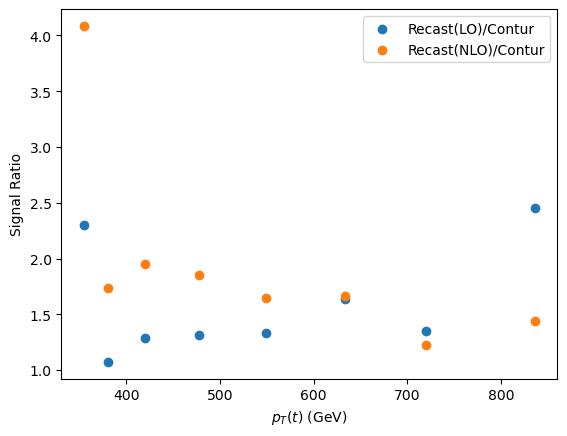

In [37]:
plt.scatter(atlas_bins[:-1],sig_LO/sig,label='Recast(LO)/Contur')
plt.scatter(atlas_bins[:-1],sig_NLO/sig,label='Recast(NLO)/Contur')
plt.xlabel(r'$p_T(t)$ (GeV)')
plt.ylabel(r'Signal Ratio')
plt.legend()
plt.show()